# Exploring transition between geotagged locations individually

In [ ]:
%load_ext autoreload
%autoreload 2

In [37]:
import mscthesis
import geopandas as gpd
import plotly.express as px
import plots
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [3]:
tweets = mscthesis.read_geotweets_raw("./../../dbs/sweden/geotweets.csv").set_index(['userid', 'region'])

In [4]:
tweets.groupby(level=0).size().tail(15)

userid
707199518400454656    452
707269946515058688    157
707941888637014016     76
708657310370021382     59
712179199260422144     49
716705607802294274     50
722569311894814720    260
750012578802364416     50
751647827651092481     61
753867220246269952     20
764655612525473792     64
778179816889675777     36
782260642770288640     47
790301765744951296     54
794973407964229636    856
dtype: int64

In [5]:
regions = tweets.groupby(['userid', 'region']).first()[['latitude', 'longitude']]
regions.head(3)

latitude  longitude
userid region                      
5616   0       57.599221  18.436371
       1       59.442985  17.952117
       2       59.652696  17.930374

In [6]:
regions = regions.reset_index(level=1)
regions.head(3)

,region,latitude,longitude
userid,,,
5616,0,57.599221,18.436371
5616,1,59.442985,17.952117
5616,2,59.652696,17.930374


In [7]:
region_groups = mscthesis.cluster_groups(regions).droplevel(0)

In [8]:

region_groups.head(4)

,region,latitude,longitude,group
userid,,,,
5616,0,57.599221,18.436371,0
5616,1,59.442985,17.952117,1
5616,2,59.652696,17.930374,1
5616,4,59.452536,17.930460,1


In [9]:
groups = region_groups.reset_index().set_index(['userid', 'region'])['group']

In [10]:
tweets_x = tweets.join(groups)

In [12]:
tweets_x.to_csv('./../../dbs/sweden/geotweets_groups.csv')

In [58]:
tweets_x['group'].groupby('userid').nunique().sort_values()

userid
1238571326      1
181577146       1
175005893       1
3013485573      1
169469726       1
             ... 
1339509816    118
263343595     118
105735403     128
223179322     128
14603919      132
Name: group, Length: 4056, dtype: int64

In [63]:
tweets_x

createdat              tweetid  \
userid             region                                                  
5616               0      2015-05-07 15:12:52+00:00   596331871241379840   
                   0      2015-07-20 09:12:12+00:00   623057810864111616   
                   0      2015-12-23 14:43:00+00:00   679673567416565760   
                   0      2016-07-25 18:42:00+00:00   757647103011262465   
                   0      2016-08-10 06:31:05+00:00   763261365930909696   
...                                             ...                  ...   
794973407964229636 116    2019-02-27 13:16:43+00:00  1100746552581201921   
                   117    2019-03-10 15:10:01+00:00  1104761332384055296   
                   118    2019-03-12 15:56:22+00:00  1105497771421941760   
                   118    2019-03-12 20:19:51+00:00  1105564078267875329   
                   119    2019-03-27 23:59:46+00:00  1111055241955495937   

                            latitude  longitude  month  weekday  hourofday  \
userid             region                                                    
5616               0       57.599221  18.436371      5        4         17   
                   0       57.599221  18.436371      7        1         11   
                   0       57.599221  18.436371     12        3         15   
                   0       57.599221  18.436371      7        1         20   
                   0       57.599221  18.436371      8        3          8   
...                              ...        ...    ...      ...        ...   
794973407964229636 116     59.309151  18.051889      2        3         14   
                   117     59.292857  18.079165      3        0         16   
                   118     59.303260  18.098290      3        2         16   
                   118     59.303260  18.098290      3        2         21   
                   119     59.317884  18.082461      3        4          0   

                                   timezone       ym  label  \
userid             region                                     
5616               0       Europe/Stockholm  2015-05  other   
                   0       Europe/Stockholm  2015-07  other   
                   0       Europe/Stockholm  2015-12  other   
                   0       Europe/Stockholm  2016-07  other   
                   0       Europe/Stockholm  2016-08  other   
...                                     ...      ...    ...   
794973407964229636 116     Europe/Stockholm  2019-02  other   
                   117     Europe/Stockholm  2019-03  other   
                   118     Europe/Stockholm  2019-03  other   
                   118     Europe/Stockholm  2019-03  other   
                   119     Europe/Stockholm  2019-03  other   

                                            geometry  group  
userid             region                                    
5616               0       POINT (18.43637 57.59922)      0  
                   0       POINT (18.43637 57.59922)      0  
                   0       POINT (18.43637 57.59922)      0  
                   0       POINT (18.43637 57.59922)      0  
                   0       POINT (18.43637 57.59922)      0  
...                                              ...    ...  
794973407964229636 116     POINT (18.05189 59.30915)      0  
                   117     POINT (18.07917 59.29286)      0  
                   118     POINT (18.09829 59.30326)      0  
                   118     POINT (18.09829 59.30326)      0  
                   119     POINT (18.08246 59.31788)      0  

[1292641 rows x 12 columns]

In [83]:
reg = tweets_x.loc[3835271].reset_index().groupby('region').head(1).set_index('region').sort_index()

In [87]:
reg

,createdat,tweetid,latitude,longitude,month,weekday,hourofday,timezone,ym,label,geometry,group
region,,,,,,,,,,,,
0,2015-10-08 13:04:15+00:00,652107236618174464,55.916700,13.100000,10,4,15,Europe/Stockholm,2015-10,home,POINT (13.10000 55.91670),0
1,2015-10-13 16:30:43+00:00,653971134090727424,55.873056,12.822500,10,2,18,Europe/Stockholm,2015-10,other,POINT (12.82250 55.87306),1
2,2015-10-14 02:25:41+00:00,654120861906141184,55.871250,12.833110,10,3,4,Europe/Stockholm,2015-10,other,POINT (12.83311 55.87125),1
3,2015-10-16 20:22:08+00:00,655116536617693189,56.033300,14.133300,10,5,22,Europe/Stockholm,2015-10,other,POINT (14.13330 56.03330),2
4,2015-10-24 20:52:30+00:00,658023280264237057,55.672933,12.567520,10,6,22,Europe/Copenhagen,2015-10,other,POINT (12.56752 55.67293),3
5,2015-10-31 22:02:23+00:00,660577581729738752,55.882281,12.829133,10,6,23,Europe/Stockholm,2015-10,other,POINT (12.82913 55.88228),1
6,2015-11-04 14:42:21+00:00,661916395744198656,55.600000,13.000000,11,3,15,Europe/Stockholm,2015-11,other,POINT (13.00000 55.60000),4
7,2015-11-17 18:04:14+00:00,666678243399966720,59.283300,15.216700,11,2,19,Europe/Stockholm,2015-11,other,POINT (15.21670 59.28330),5
8,2015-11-26 14:57:21+00:00,669892704315252736,59.335802,18.056312,11,4,15,Europe/Stockholm,2015-11,other,POINT (18.05631 59.33580),6


In [88]:
user_region_groups = tweets_x.loc[3835271].reset_index()

In [89]:
homes = pd.read_csv("./../../dbs/sweden/homelocations.csv").set_index('userid')

In [90]:
fig = px.scatter_mapbox(user_region_groups, lat='latitude', lon='longitude', hover_data=['group', 'region'], color='label')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [14]:
visits = mscthesis.visit_gaps(tweets_x)

In [91]:
u = visits.loc[3835271]

In [92]:
u

,createdat_origin,tweetid_origin,latitude_origin,longitude_origin,month_origin,weekday_origin,hourofday_origin,timezone_origin,ym_origin,label_origin,...,latitude_destination,longitude_destination,month_destination,weekday_destination,hourofday_destination,timezone_destination,ym_destination,label_destination,geometry_destination,group_destination
userid,,,,,,,,,,,,,,,,,,,,,
3835271,2015-10-08 13:04:15+00:00,652107236618174464,55.916700,13.100000,10,4,15,Europe/Stockholm,2015-10,home,...,55.916700,13.100000,10,3,3,Europe/Stockholm,2015-10,home,POINT (13.10000 55.91670),0
3835271,2015-10-14 01:56:49+00:00,654113598189510656,55.916700,13.100000,10,3,3,Europe/Stockholm,2015-10,home,...,55.916700,13.100000,10,4,0,Europe/Stockholm,2015-10,home,POINT (13.10000 55.91670),0
3835271,2015-10-14 22:34:12+00:00,654424996928991232,55.916700,13.100000,10,4,0,Europe/Stockholm,2015-10,home,...,55.916700,13.100000,10,6,22,Europe/Stockholm,2015-10,home,POINT (13.10000 55.91670),0
3835271,2015-10-17 20:34:24+00:00,655482010568380416,55.916700,13.100000,10,6,22,Europe/Stockholm,2015-10,home,...,55.916700,13.100000,10,0,19,Europe/Stockholm,2015-10,home,POINT (13.10000 55.91670),0
3835271,2015-10-18 17:08:09+00:00,655792496438550528,55.916700,13.100000,10,0,19,Europe/Stockholm,2015-10,home,...,55.916700,13.100000,11,2,23,Europe/Stockholm,2015-11,home,POINT (13.10000 55.91670),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835271,2016-06-25 15:47:26+00:00,746731538209996800,55.908207,13.262567,6,6,17,Europe/Stockholm,2016-06,other,...,55.869044,12.821652,6,0,6,Europe/Stockholm,2016-06,other,POINT (12.82165 55.86904),1
3835271,2016-06-26 04:16:56+00:00,746920154454450176,55.869044,12.821652,6,0,6,Europe/Stockholm,2016-06,other,...,55.869044,12.821652,6,0,19,Europe/Stockholm,2016-06,other,POINT (12.82165 55.86904),1
3835271,2016-06-26 17:56:30+00:00,747126405457154048,55.869044,12.821652,6,0,19,Europe/Stockholm,2016-06,other,...,55.756567,12.904715,7,2,17,Europe/Stockholm,2016-07,other,POINT (12.90471 55.75657),24


In [131]:
t = u.groupby(['group_origin', 'group_destination']).size()
for g in list(set(t.index.get_level_values(1)) - set(t.index.get_level_values(0))):
    t.loc[(g,g)] = 1
t.unstack(fill_value=0)

group_destination,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
group_origin,,,,,,,,,,,,,,,,,,,,,
0,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
region_by_group_probs = tweets_x.loc[5616].groupby(['group', 'region']).size().sort_values(ascending=False)

In [47]:
probs = np.power(np.arange(1, region_by_group_probs.shape[0] + 1), -1.2)
probs = pd.Series(probs / np.sum(probs), index=region_by_group_probs.index).unstack().fillna(0)
probs = probs.div(
            probs.sum(axis=1),  # summation of each row
            axis=0,
        )

In [51]:
probs.loc[1]

region
0      0.000000
1      0.004514
2      0.030078
4      0.001423
5      0.135250
         ...   
610    0.000000
611    0.000146
612    0.000146
613    0.000146
614    0.000000
Name: 1, Length: 614, dtype: float64

In [15]:
group_flow_by_user = visits.groupby(['userid', 'group_origin', 'group_destination']).size()

In [32]:
test = group_flow_by_user.loc[5616].to_frame()
test

0
group_origin group_destination     
0            0                  245
             1                   13
             3                    1
             31                   1
             42                   1
...                             ...
39           40                   1
40           38                   1
41           1                    1
             41                   4
42           1                    1

[127 rows x 1 columns]

In [33]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(range(test.index.get_level_values(0).max())),
      color = "blue"
    ),
    link = dict(
      source = test.index.get_level_values(0), # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = test.index.get_level_values(1),
      value = test.values,
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

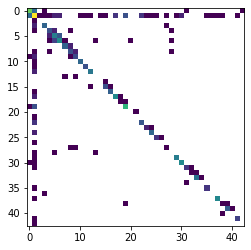

In [36]:
groups_odm = group_flow_by_user.loc[5616].sort_index(level=0).unstack(fill_value=0).sort_index(axis=1)
plt.imshow(
    groups_odm.values,
    norm=mpl.colors.LogNorm(),
)

In [37]:
mat_groups = groups_odm.to_numpy()
mat_groups

array([[ 245,   13,    0, ...,    0,    0,    1],
       [  12, 1313,    1, ...,    0,    1,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    4,    0],
       [   0,    1,    0, ...,    0,    0,    0]])

In [38]:
mat_groups_x = mat_groups + mat_groups.T - np.diag(np.diag(mat_groups))
mat_groups_x

array([[ 245,   25,    0, ...,    0,    0,    1],
       [  25, 1313,    2, ...,    0,    2,    1],
       [   0,    2,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    2,    0, ...,    0,    4,    0],
       [   1,    1,    0, ...,    0,    0,    0]])

In [39]:
mat_groups_prob = mat_groups_x / mat_groups_x.sum()
mat_groups_prob

array([[1.07267951e-01, 1.09457093e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.37828371e-04],
       [1.09457093e-02, 5.74868651e-01, 8.75656743e-04, ...,
        0.00000000e+00, 8.75656743e-04, 4.37828371e-04],
       [0.00000000e+00, 8.75656743e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.75656743e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.75131349e-03, 0.00000000e+00],
       [4.37828371e-04, 4.37828371e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [46]:
mat_groups_prob.max()

0.5748686514886164